In [2]:
import random
import uuid

import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon


In [3]:
def generate_random_point_in_polygon(polygon):
    """
    Generates a random latitude and longitude within a given polygon.
    Parameters:
    polygon (Polygon): The input polygon within which to generate the point.
    Returns:
    (float, float): A tuple of latitude and longitude of the random point within the polygon.
    """
    min_x, min_y, max_x, max_y = polygon.bounds
    random_point = Point([np.random.uniform(min_x, max_x), np.random.uniform(min_y, max_y)])
    if polygon.contains(random_point):
        return random_point.y, random_point.x


# .xlsx File creation

In [20]:
file = "/users/referential_countries.geojson"
users_per_country = 2
countries = gpd.read_file(file)
total_users = len(countries)*users_per_country

users_list = []
for x in range(len(countries)):
    random_country = random.choice(countries.index)
    random_country_geometry = countries["geometry"][x]
    for y in range(users_per_country):
        location = generate_random_point_in_polygon(random_country_geometry)
        users_list.append(
            {
                "uuid": uuid.uuid4(),
                "Country": random_country,
                "user_location": location
            }
        )

df_users = pd.DataFrame(users_list)
pd.DataFrame(df_users["user_location"].tolist(), index=df_users.index)
df_users = df_users[~df_users["user_location"].isna()]
df_users[['latitude', 'longitude']] = pd.DataFrame(df_users["user_location"].tolist(), index=df_users.index)
df_users["email"] = df_users["uuid"].astype(str)+"@gmail.com"
df_users.to_csv(f"/home/jalandet504/code/jalandet/lewagon-earthquake/earthquake-project/users/{total_users}_random_users.csv", sep=";", index=False)
df_users


,uuid,Country,user_location,latitude,longitude,email
1,4be50108-8b5e-43b2-9d55-c947298b0434,107,"(12.611481704422772, -70.05195584307923)",12.611482,-70.051956,4be50108-8b5e-43b2-9d55-c947298b0434@gmail.com
3,b18b0d55-4e74-4d3a-98e8-e55db8bac8f4,57,"(34.12037375597971, 66.6309559840424)",34.120374,66.630956,b18b0d55-4e74-4d3a-98e8-e55db8bac8f4@gmail.com
4,a6f961cb-0bd7-481f-a1ce-72ab3215c853,193,"(-16.547623723899054, 18.124192582700793)",-16.547624,18.124193,a6f961cb-0bd7-481f-a1ce-72ab3215c853@gmail.com
15,c6016755-07b9-418f-9a45-95605b25b93c,0,"(25.532587018665744, 55.526834392902096)",25.532587,55.526834,c6016755-07b9-418f-9a45-95605b25b93c@gmail.com
16,21169f49-af8b-406f-9099-5f4d546c92d7,184,"(-23.22716604078336, -64.56902426813234)",-23.227166,-64.569024,21169f49-af8b-406f-9099-5f4d546c92d7@gmail.com
...,...,...,...,...,...,...
502,030a1b71-725c-4f90-9325-70d4895df933,253,"(17.51056223669373, 43.4935070772726)",17.510562,43.493507,030a1b71-725c-4f90-9325-70d4895df933@gmail.com
503,47159560-b40c-49b1-a683-f5d6a2f71b3c,253,"(16.762251905730558, 48.94462420411174)",16.762252,48.944624,47159560-b40c-49b1-a683-f5d6a2f71b3c@gmail.com
504,552a228a-5c8d-4568-99e3-bea521ee005b,164,"(-28.66054043636508, 25.691124045897897)",-28.660540,25.691124,552a228a-5c8d-4568-99e3-bea521ee005b@gmail.com
507,a17a3688-0d0c-4b93-a497-111e35dc7782,95,"(-14.936071547112393, 22.089894523499904)",-14.936072,22.089895,a17a3688-0d0c-4b93-a497-111e35dc7782@gmail.com


# Exploration

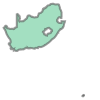

In [68]:
geom1 = countries["geometry"][252]
geom1


In [69]:
print(type(geom1))


<class 'shapely.geometry.multipolygon.MultiPolygon'>


In [70]:
generate_random_point_in_polygon(geom1)


(-26.629777798048853, 25.19433561523619)

In [22]:
geom2 = countries["geometry"][countries["ADMIN"]=="South Africa"]
geom2


252    MULTIPOLYGON (((37.86378 -46.94085, 37.83644 -...
Name: geometry, dtype: geometry

In [23]:
print(type(geom2))


<class 'geopandas.geoseries.GeoSeries'>


In [72]:
generate_random_point_in_polygon(geom2)


ValueError: could not convert string to float: 'minx'